Ch15 NumPy常见基础运算
# 常见运算
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import cm 
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 自定义函数

In [80]:
def visualize_fx(x_array, y_array, title):
    
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(x_array, y_array)
    # ax.set_xlim(x_array.min(), x_array.max())
    # ax.set_ylim(np.floor(y_array.min()), np.ceil(y_array.max()))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)    
    ax.set_xticks(np.arange(-4,4+1,1))
    ax.set_yticks(np.arange(-4,4+1,1))
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    # ax.spines['bottom'].set_position(('data',0))
    # ax.spines['left'].set_position(('data',0))
    # ax.spines['right'].set_color('none')
    # ax.spines['top'].set_color('none')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    plt.grid()
    ax.set_aspect('equal', adjustable='box')
    fig.savefig('Figures/' + title + '.svg', format='svg')


def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".2f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title, vmax, vmin):
    fig, ax = plt.subplots()
    
    cmap = plt.colormaps.get_cmap("RdYlBu")
    
    array_norm = (array - vmin) / (vmax - vmin)

    colors = cmap(array_norm)

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = "{:.1f}".format(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 加减乘除、乘幂

### 一维

#### 定义数组

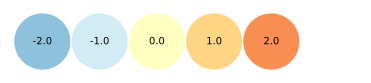

In [81]:
a_1D = np.arange(-2,2+1)
visualize_1D(a_1D, '一维数组', -4, 4)

In [82]:
all_twos = 2*np.ones_like(a_1D)
all_twos

array([2, 2, 2, 2, 2])

In [83]:
np.full_like(a_1D, 2)

array([2, 2, 2, 2, 2])

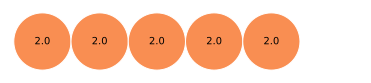

In [84]:
visualize_1D(all_twos, '一维数组，全2', -4, 4)

#### 加法

In [85]:
a_1D + all_twos

array([0, 1, 2, 3, 4])

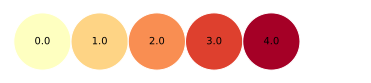

In [86]:
visualize_1D(a_1D + all_twos, '一维数组，加法', -4, 4)

In [87]:
np.add(a_1D, all_twos)

array([0, 1, 2, 3, 4])

#### 减法

In [88]:
a_1D - all_twos

array([-4, -3, -2, -1,  0])

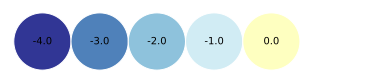

In [89]:
visualize_1D(a_1D - all_twos, '一维数组，减法', -4, 4)

In [90]:
np.subtract(a_1D, all_twos)

array([-4, -3, -2, -1,  0])

#### 乘法

In [91]:
a_1D * all_twos

array([-4, -2,  0,  2,  4])

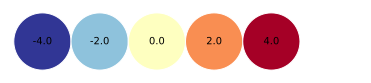

In [92]:
visualize_1D(a_1D * all_twos, '一维数组，乘法', -4, 4)

In [93]:
np.multiply(a_1D, all_twos)

array([-4, -2,  0,  2,  4])

#### 除法

In [94]:
a_1D/all_twos

array([-1. , -0.5,  0. ,  0.5,  1. ])

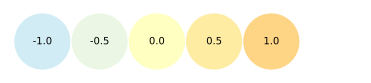

In [95]:
visualize_1D(a_1D/all_twos, '一维数组，除法', -4, 4)

In [96]:
np.divide(a_1D, all_twos)

array([-1. , -0.5,  0. ,  0.5,  1. ])

#### 乘幂

In [97]:
a_1D ** all_twos

array([4, 1, 0, 1, 4])

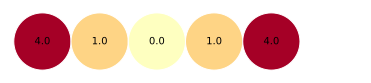

In [98]:
visualize_1D(a_1D ** all_twos, '一维数组，乘幂', -4, 4)

In [99]:
np.power(a_1D,all_twos)

array([4, 1, 0, 1, 4])

### 二维数组

In [100]:
a_2D = np.random.uniform(-1, 1, (4,6))
a_2D

array([[-0.41029154,  0.72640018,  0.55373358,  0.30661222, -0.1677651 ,
        -0.09259808],
       [ 0.86639963, -0.59075752, -0.33529972,  0.36451017, -0.9235633 ,
        -0.01983738],
       [-0.9620171 ,  0.28113735,  0.39308946, -0.40170008,  0.27343405,
        -0.17272973],
       [ 0.45168722,  0.52293492, -0.28830417, -0.29579429,  0.49918835,
         0.24766875]])

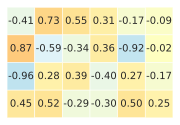

In [101]:
visualize_2D(a_2D, '二维数组', 3, -3)

In [102]:
all_twos_2D = np.full_like(a_2D, 2)
all_twos_2D

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

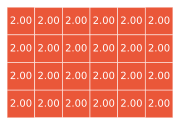

In [103]:
visualize_2D(all_twos_2D, '二维，全2', 3, -3)

#### 加法

In [104]:
a_2D + all_twos_2D

array([[1.58970846, 2.72640018, 2.55373358, 2.30661222, 1.8322349 ,
        1.90740192],
       [2.86639963, 1.40924248, 1.66470028, 2.36451017, 1.0764367 ,
        1.98016262],
       [1.0379829 , 2.28113735, 2.39308946, 1.59829992, 2.27343405,
        1.82727027],
       [2.45168722, 2.52293492, 1.71169583, 1.70420571, 2.49918835,
        2.24766875]])

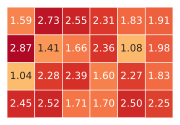

In [105]:
visualize_2D(a_2D + all_twos_2D, '二维加法', 3, -3)

#### 减法

In [106]:
a_2D - all_twos_2D

array([[-2.41029154, -1.27359982, -1.44626642, -1.69338778, -2.1677651 ,
        -2.09259808],
       [-1.13360037, -2.59075752, -2.33529972, -1.63548983, -2.9235633 ,
        -2.01983738],
       [-2.9620171 , -1.71886265, -1.60691054, -2.40170008, -1.72656595,
        -2.17272973],
       [-1.54831278, -1.47706508, -2.28830417, -2.29579429, -1.50081165,
        -1.75233125]])

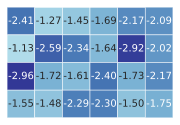

In [107]:
visualize_2D(a_2D - all_twos_2D, '二维减法', 3, -3)

#### 乘法

In [108]:
a_2D * all_twos_2D

array([[-0.82058309,  1.45280037,  1.10746716,  0.61322443, -0.3355302 ,
        -0.18519615],
       [ 1.73279926, -1.18151504, -0.67059943,  0.72902034, -1.8471266 ,
        -0.03967475],
       [-1.9240342 ,  0.56227471,  0.78617892, -0.80340017,  0.54686809,
        -0.34545946],
       [ 0.90337443,  1.04586985, -0.57660834, -0.59158859,  0.9983767 ,
         0.4953375 ]])

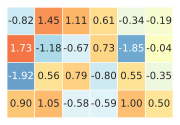

In [109]:
visualize_2D(a_2D * all_twos_2D, '二维乘法', 3, -3)

#### 除法

In [110]:
a_2D / all_twos_2D

array([[-0.20514577,  0.36320009,  0.27686679,  0.15330611, -0.08388255,
        -0.04629904],
       [ 0.43319981, -0.29537876, -0.16764986,  0.18225508, -0.46178165,
        -0.00991869],
       [-0.48100855,  0.14056868,  0.19654473, -0.20085004,  0.13671702,
        -0.08636486],
       [ 0.22584361,  0.26146746, -0.14415209, -0.14789715,  0.24959418,
         0.12383438]])

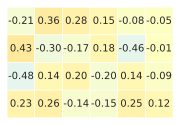

In [111]:
visualize_2D(a_2D / all_twos_2D, '二维除法', 3, -3)

#### 乘幂

In [112]:
a_2D ** all_twos_2D

array([[1.68339151e-01, 5.27657228e-01, 3.06620876e-01, 9.40110508e-02,
        2.81451283e-02, 8.57440370e-03],
       [7.50648316e-01, 3.48994446e-01, 1.12425900e-01, 1.32867663e-01,
        8.52969168e-01, 3.93521469e-04],
       [9.25476898e-01, 7.90382118e-02, 1.54519322e-01, 1.61362958e-01,
        7.47661775e-02, 2.98355594e-02],
       [2.04021341e-01, 2.73460935e-01, 8.31192957e-02, 8.74942638e-02,
        2.49189009e-01, 6.13398103e-02]])

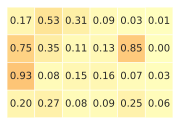

In [113]:
visualize_2D(a_2D ** all_twos_2D, '二维乘幂', 3, -3)

## 广播原则

### 一维

In [114]:
a_1D + 2

array([0, 1, 2, 3, 4])

In [115]:
a_1D - 2

array([-4, -3, -2, -1,  0])

In [116]:
a_1D * 2

array([-4, -2,  0,  2,  4])

In [117]:
a_1D / 2

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [118]:
a_1D ** 2

array([4, 1, 0, 1, 4])

In [119]:
a_1D % 2

array([0, 1, 0, 1, 0])

### 一维数组、列向量运算

In [120]:
a_1D + np.array([[1], [2], [3]])

array([[-1,  0,  1,  2,  3],
       [ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5]])

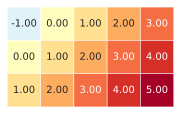

In [121]:
visualize_2D(a_1D + np.array([[1], [2], [3]]), '一维数组、列向量运算，加法', 5, -5)

In [122]:
a_1D * np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [-4, -2,  0,  2,  4],
       [-6, -3,  0,  3,  6]])

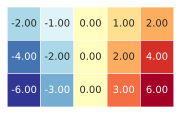

In [123]:
visualize_2D(a_1D * np.array([[1], [2], [3]]), '一维数组、列向量运算，乘法', 5, -5)

In [124]:
a_1D ** np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [ 4,  1,  0,  1,  4],
       [-8, -1,  0,  1,  8]])

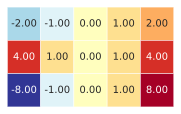

In [125]:
visualize_2D(a_1D ** np.array([[1], [2], [3]]), '一维数组、列向量运算，乘幂', 5, -5)

### 二维数组和标量

#### 加法

In [126]:
a_2D + 2

array([[1.58970846, 2.72640018, 2.55373358, 2.30661222, 1.8322349 ,
        1.90740192],
       [2.86639963, 1.40924248, 1.66470028, 2.36451017, 1.0764367 ,
        1.98016262],
       [1.0379829 , 2.28113735, 2.39308946, 1.59829992, 2.27343405,
        1.82727027],
       [2.45168722, 2.52293492, 1.71169583, 1.70420571, 2.49918835,
        2.24766875]])

### 二维数组和一维数组

In [127]:
np.linspace(-1,1,6)

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

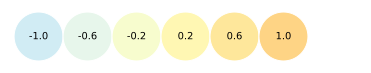

In [128]:
visualize_1D(np.linspace(-1,1,6), '一维数组，6个元素', -4, 4)

In [129]:
a_2D + np.linspace(-1,1,6)

array([[-1.41029154,  0.12640018,  0.35373358,  0.50661222,  0.4322349 ,
         0.90740192],
       [-0.13360037, -1.19075752, -0.53529972,  0.56451017, -0.3235633 ,
         0.98016262],
       [-1.9620171 , -0.31886265,  0.19308946, -0.20170008,  0.87343405,
         0.82727027],
       [-0.54831278, -0.07706508, -0.48830417, -0.09579429,  1.09918835,
         1.24766875]])

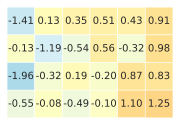

In [130]:
visualize_2D(a_2D + np.linspace(-1,1,6), '二维数组和一维数组，加法', 5, -5)

In [131]:
# 行向量
np.linspace(-1,1,6).reshape(1,-1)

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

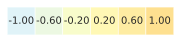

In [132]:
visualize_2D(np.linspace(-1,1,6).reshape(1,-1), '行向量，6个元素', 5, -5)

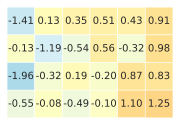

In [133]:
visualize_2D(a_2D + np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，加法', 5, -5)

In [134]:
a_2D * np.linspace(-1,1,6)

array([[ 0.41029154, -0.43584011, -0.11074672,  0.06132244, -0.10065906,
        -0.09259808],
       [-0.86639963,  0.35445451,  0.06705994,  0.07290203, -0.55413798,
        -0.01983738],
       [ 0.9620171 , -0.16868241, -0.07861789, -0.08034002,  0.16406043,
        -0.17272973],
       [-0.45168722, -0.31376095,  0.05766083, -0.05915886,  0.29951301,
         0.24766875]])

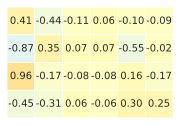

In [135]:
visualize_2D(a_2D * np.linspace(-1,1,6), '二维数组和一维数组，乘法', 5, -5)

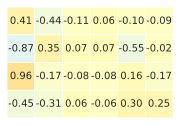

In [136]:
visualize_2D(a_2D * np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，乘法', 5, -5)

In [137]:
a_2D + np.array([-2, -1, 0, 1])
# 报错

ValueError: operands could not be broadcast together with shapes (4,6) (4,) 

In [ ]:
visualize_2D(np.array([[-2], [-1], [0], [1]]), '列向量，4个元素', 5, -5)

In [ ]:
visualize_2D(a_2D + np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，加法', 5, -5)

In [ ]:
visualize_2D(a_2D * np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，乘法', 5, -5)

### 三维

In [ ]:
A_3D = np.arange(-30, 30).reshape(3,4,5)
A_3D

In [ ]:
A_3D + 2

In [ ]:
A_3D + np.arange(1,5+1)

In [ ]:
np.array([[[1, 2, 3, 4, 5]]])

In [ ]:
A_3D + np.array([[[1, 2, 3, 4, 5]]])

In [ ]:
np.array([[[1]],[[2]],[[3]]])

In [ ]:
A_3D + np.array([[[1]],[[2]],[[3]]])

In [ ]:
np.array([[[1],[2],[3],[4]]])

In [ ]:
A_3D + np.array([[[1],[2],[3], [4]]])

## 数学函数
NumPy有大量数学函数，这个笔记我们仅仅选取几个常用的数学函数，并可视化函数图形。

In [ ]:
x_array = np.linspace(-4,4,81)
x_array

In [ ]:
title = '绝对值函数'
visualize_fx(x_array, np.abs(x_array), title)

In [ ]:
title = '正弦函数'
visualize_fx(x_array, np.sin(x_array), title)

In [ ]:
title = '余弦函数'
visualize_fx(x_array, np.cos(x_array), title)

In [ ]:
title = '指数函数'
visualize_fx(x_array, np.exp(x_array), title)
# 指数函数通常特指以e为底数的指数函数

In [ ]:
# 请大家可视化更多一元函数

## 统计函数

In [ ]:
A_2D = np.random.randint(0,10, size = (4,6))
A_2D

In [ ]:
visualize_2D(A_2D, '二维数组', 9, 0)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data_array = iris.data

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(iris_data_array,   # 鸢尾花数据数组
            cmap = 'RdYlBu_r', # 指定色谱
            ax = ax,           # 指定轴
            vmax = 8,          # 色谱最大值
            vmin = 0,          # 色谱最小值
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据热图.svg', format='svg')

### 最大值

In [141]:
a_2D.max()

0.8663996282075683

In [142]:
a_2D.max(axis = 0)

array([0.86639963, 0.72640018, 0.55373358, 0.36451017, 0.49918835,
       0.24766875])

In [ ]:
visualize_1D(A_2D.max(axis = 0), '沿axis = 0，最大值', 0, 9)

In [ ]:
A_2D.max(axis = 1)

In [ ]:
A_2D.max(axis = 1, keepdims = True)

In [ ]:
visualize_1D(A_2D.max(axis = 1), '沿axis = 1，最大值', 0, 9)

In [ ]:
iris_data_array.max()

In [ ]:
iris_data_array.max(axis = 0)

In [ ]:
visualize_1D(iris_data_array.max(axis = 0), '鸢尾花沿axis = 0，最大值', 0, 8)

In [ ]:
np.argmax(iris_data_array, axis=0)

In [ ]:
iris_data_array.max(axis = 1)

In [ ]:
np.argmax(iris_data_array, axis=1)

### 最小值

In [ ]:
A_2D.min()

In [ ]:
A_2D.min(axis = 0)

In [ ]:
visualize_1D(A_2D.min(axis = 0), '鸢尾花沿axis = 0，最小值', 0, 8)

In [ ]:
A_2D.min(axis = 1)

In [ ]:
visualize_1D(A_2D.min(axis = 1), '鸢尾花沿axis = 1，最小值', 0, 8)

In [ ]:
iris_data_array.min()

In [ ]:
iris_data_array.min(axis = 0)

In [ ]:
visualize_1D(iris_data_array.min(axis = 0), '沿axis = 0，最小值', 0, 8)

In [ ]:
np.argmin(iris_data_array, axis=0)

In [ ]:
iris_data_array.min(axis = 1)

### 求和

In [ ]:
iris_data_array.sum()

In [ ]:
iris_data_array.sum(axis = 0)

In [ ]:
iris_data_array.sum(axis = 1)

### 平均值
$${\displaystyle \mu ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}.} $$

In [ ]:
np.average(iris_data_array)

In [ ]:
np.average(iris_data_array, axis = 0)

In [ ]:
np.average(iris_data_array, axis = 1)

### 方差
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n - 1}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [ ]:
np.var(iris_data_array)
# 注意，NumPy中默认分母为n

NumPy默认计算：
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [ ]:
np.var(iris_data_array, axis = 0)

In [ ]:
np.var(iris_data_array, axis = 0, ddof = 1)
# 将分母设为n - 1

### 标准差

In [ ]:
np.std(iris_data_array, axis = 0)
# 注意，NumPy中默认分母为n

### 协方差矩阵

In [ ]:
np.cov(iris_data_array.T, ddof = 1)
# 注意转置

In [ ]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.cov(iris_data_array.T, ddof = 1),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据协方差矩阵.svg', format='svg')

### 相关性系数矩阵

In [ ]:
np.corrcoef(iris_data_array.T)
# 注意转置

In [ ]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.corrcoef(iris_data_array.T),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据相关性系数矩阵.svg', format='svg')

请大家自行学习如下函数：  
numpy.percentile()  
numpy.quantile()  
numpy.median()   
numpy.nanmean()  
numpy.nanmedian()  
numpy.nanstd()  
numpy.nanvar()  

## 参考阅读

关于广播原则，请参考：  
https://numpy.org/doc/stable/user/basics.broadcasting.html  
有关数学函数，请参考：  
https://numpy.org/doc/stable/reference/routines.math.html  
有关统计函数，请参考：  
https://numpy.org/doc/stable/reference/routines.statistics.html  
有关逻辑函数，请参考：  
https://numpy.org/doc/stable/reference/routines.logic.html  

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023

In [76]:
import numpy as np

# 生成一个(4, 6)的二维数组
a = np.random.rand(4, 6)

# 生成一个(4,)的一维数组
b = np.random.rand(6)

# 进行广播运算
c = a + b
print(c)

[[0.69188047 0.82384179 0.62115944 0.94796004 1.8177021  0.49334024]
 [1.0381907  1.30431482 1.23708515 1.07755281 1.88511305 0.59691339]
 [0.63837925 0.98958194 0.77913747 1.23729082 0.9826055  0.67699652]
 [1.47179772 1.03644447 0.81240073 1.50714994 1.03984588 1.07111346]]


In [ ]:
print()

In [77]:
import numpy as np

# 计算正弦函数
x = np.array([0, np.pi/2, np.pi])
y = np.sin(x)
print("sin(x) =", y)

# 计算指数函数
x = np.array([1, 2, 3])
y = np.exp(x)
print("exp(x) =", y)

# 计算对数函数
x = np.array([1, 2, 4, 10])
y = np.log(x)
print("log(x) =", y)

# 计算圆周率和欧拉数
print("pi =", np.pi)
print("e =", np.e)

# 计算正无穷和非数
print("inf =", np.Inf)
print("nan =", np.NaN)

sin(x) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
exp(x) = [ 2.71828183  7.3890561  20.08553692]
log(x) = [0.         0.69314718 1.38629436 2.30258509]
pi = 3.141592653589793
e = 2.718281828459045
inf = inf
nan = nan


In [143]:
import numpy as np

# 生成一个二维数组
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一列的最大值
max_col = A.max(axis=0)
print("每一列的最大值：", max_col)

# 计算每一行的最大值
max_row = A.max(axis=1)
print("每一行的最大值：", max_row)

每一列的最大值： [7 8 9]
每一行的最大值： [3 6 9]
